In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:

workouts = []

with open('../../data/workouts/dataset.json', 'r') as input_file:
  workouts = json.loads(input_file.read())

df = pd.DataFrame(workouts)
df['adj_output'] = df['output'] / df['length']

df.head()

,output,length,type,adj_output
0,201,2,NORMAL,100.5
1,218,2,NORMAL,109.0
2,236,2,NORMAL,118.0
3,272,2,NORMAL,136.0
4,0,2,LOW_IMPACT,0.0


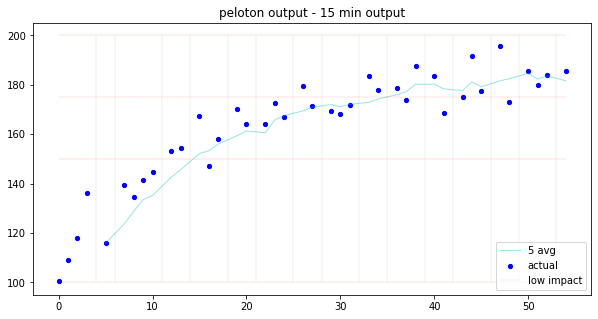

In [3]:
plt.figure(figsize=(10, 5))
plt.title('peloton output - 15 min output')

data = df[df['type'] != 'LOW_IMPACT']

x = data.index
y = data.adj_output
avgs = y.rolling(5).mean().dropna()

plt.plot(avgs, label='5 avg', c='c', alpha=0.4, lw=1)
plt.scatter(x, y, label='actual', c='blue', s=18)

vmin = 100
vmax = 200
low_impact = df[df['type'] == 'LOW_IMPACT'].index
plt.vlines(low_impact, vmin, vmax, colors='green', alpha=0.3, label='low impact', lw=.3)

plt.hlines([200], x[0], x[-1], colors='red', alpha=0.4, lw=.3)
plt.hlines([150], x[0], x[-1], colors='red', alpha=0.4, lw=.3) ## 300
plt.hlines([100], x[0], x[-1], colors='red', alpha=0.4, lw=.3)

plt.hlines([175], x[0], x[-1], colors='red', alpha=0.4, lw=.4, linestyle='--') ## goal,

plt.legend(loc='lower right')
plt.show()

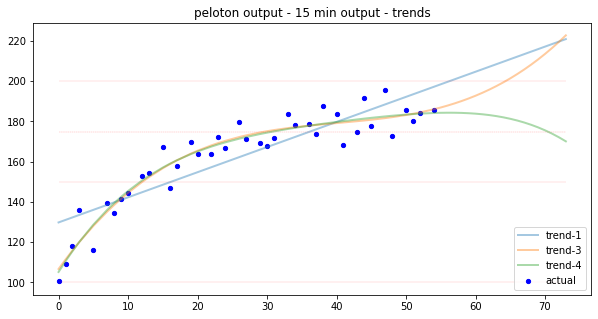

In [4]:
plt.figure(figsize=(10, 5))
plt.title('peloton output - 15 min output - trends')

x_projs = list(x) + list(range(x[-1] + 1, x[-1] + 20))

for deg in [1, 3, 4]:
  model = np.poly1d(
      np.polyfit(x=x, y=y, deg=deg)
  )

  projs = [model(i) for i in x_projs]
  plt.plot(x_projs, projs, label=f'trend-{deg}', alpha=0.4, lw=2)

plt.scatter(x, y, label='actual', c='blue', s=18)

plt.hlines([200], x_projs[0], x_projs[-1], colors='red', alpha=0.4, lw=.3)
plt.hlines([150], x_projs[0], x_projs[-1], colors='red', alpha=0.4, lw=.3)
plt.hlines([100], x_projs[0], x_projs[-1], colors='red', alpha=0.4, lw=.3)

plt.hlines([175], x_projs[0], x_projs[-1], colors='red', alpha=0.4, lw=.4, linestyle='--') ## goal,

plt.legend(loc='lower right')
plt.show()

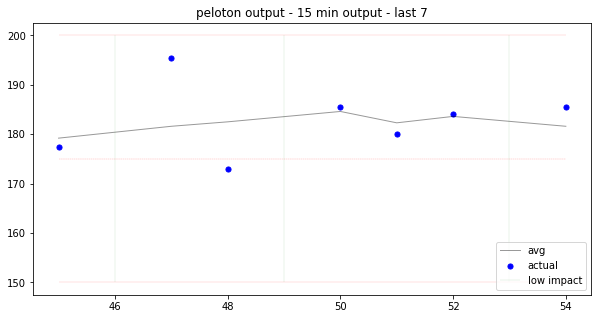

In [5]:
last_7_x = x[-7:]
last_7_y = y[-7:]
last_7_avgs = avgs[-7:]

plt.figure(figsize=(10, 5))
plt.title('peloton output - 15 min output - last 7')

plt.plot(last_7_avgs, label='avg', c='black', alpha=0.4, lw=1)
plt.scatter(last_7_x, last_7_y, label='actual', c='blue', s=26)

vmin = 150
vmax = 200

last_7_li = low_impact[low_impact > last_7_x[0]]
plt.vlines(last_7_li, vmin, vmax, colors='green', alpha=0.3, label='low impact', lw=.3)

min_ = last_7_x[0]
max_ = last_7_x[-1]
plt.hlines([200], min_, max_, colors='red', alpha=0.4, lw=.3)
plt.hlines([150], min_, max_, colors='red', alpha=0.4, lw=.3)

plt.hlines([175], min_, max_, colors='red', alpha=0.4, lw=.4, linestyle='--') ## goal, 350

plt.legend(loc='lower right')
plt.show()

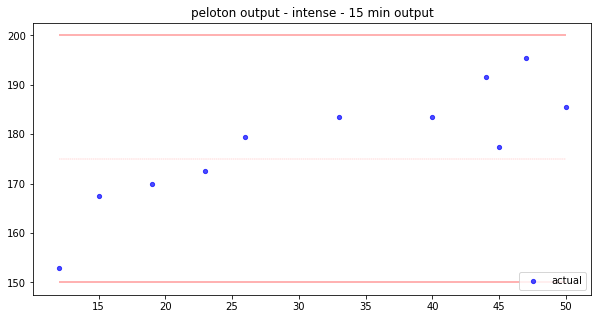

In [6]:
plt.figure(figsize=(10, 5))
plt.title('peloton output - intense - 15 min output')

data_int = df[df['type'].isin(['CLIMB', 'HIIT', 'HIIT_AND_HILLS'])]

x_int = data_int.index
y_int = data_int.adj_output

plt.scatter(x_int, y_int, label='actual', c='blue', alpha=0.7, s=18)

min_ = x_int[0]
max_ = x_int[-1]
plt.hlines([200], min_, max_, colors='red', alpha=0.4)
plt.hlines([150], min_, max_, colors='red', alpha=0.4)

plt.hlines([175], min_, max_, colors='red', alpha=0.4, lw=.4, linestyle='--') ## goal, 350

plt.legend(loc='lower right')
plt.show()